# K-Means Algorithm for Clustering ... Workout

In this notebook, we will workout the steps for performing KMeans from scratch, without caring about the code optimisation.

**The steps of KMeans algorithm are as follow:** 

- Step 1: Choose the number of clusters k
- Step 2: Select k random points from the data as centroids or randomly intialize them
- Step 3: Assign all the points to the closest cluster centroid
- Step 4: Recompute the centroids of newly formed clusters
- Step 5: Repeat steps 3 and 4 until convergence, or reaching the maximum number of iterations

In [118]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import time
%matplotlib inline
from IPython import display


In [139]:
# Create a function to intitalize the centroids randomly
def initialize_centriods(X, K):
    centroids = np.zeros((K, X.shape[1])) # row , column full with zero 
    for k in range(K): # iterations of 
        centroids[k] = X[np.random.choice(range(X.shape[0]))] # random centroids
    return centroids # return random centroids
    # centroids = np.random.rand(K, X.shape[1]) # randomly intialized
    # return centroids


In [134]:
# Create a function to form the clusters based on the points and the closest clusters
def assign_points_to_clusters(X, centriods):
    clusters = [[] for _ in range(len(centriods))]
    # Go through each  point and determine which is the closest centriod:
    for idx, point in enumerate(X):
        closest_centriod = np.argmin(np.sqrt(np.sum((point - centriods) ** 2, axis= 1)))
        clusters[closest_centriod].append(idx)
    return clusters


In [135]:
# Create a function to recompute the centriods
def calculate_new_centriods(clusters, X):
    centroids = np.zeros((len(clusters), X.shape[1]))
    for idx, cluster in enumerate(clusters):
        new_centriod = np.mean(X[cluster], axis=0)
        centroids[idx] = new_centriod
    
    return centroids


In [136]:
# Create a function to assign a label/cluster for each point
def predict_cluster(X, clusters):
    y_pred = np.zeros(X.shape[0]) # number of samples
    for cluster_idx, cluster in enumerate(clusters):
        for sample_idx in cluster:
            y_pred[sample_idx] = cluster_idx

    return y_pred

(500, 2)


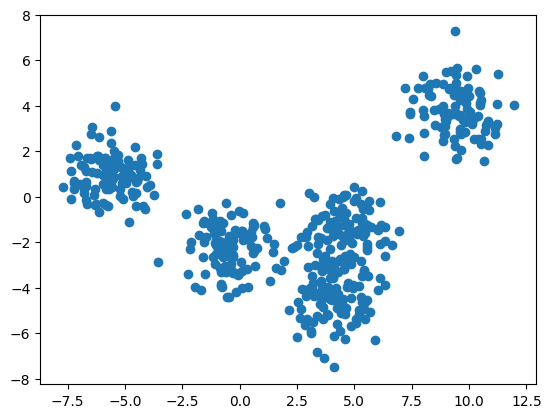

In [169]:
np.random.seed(123)
# create dummy dataset
num_clusters = 5
X, _ = make_blobs(n_samples= 500, n_features= 2, centers= num_clusters)
print(X.shape)
# visualise data
plt.scatter(X[:,0], X[:,1])
plt.show()

[[ 4.69033311 -3.95374445]
 [ 8.93545608  3.09158212]
 [ 9.3696863   3.74470333]
 [ 4.98955463  0.4467116 ]
 [-5.02709516  0.70733839]]


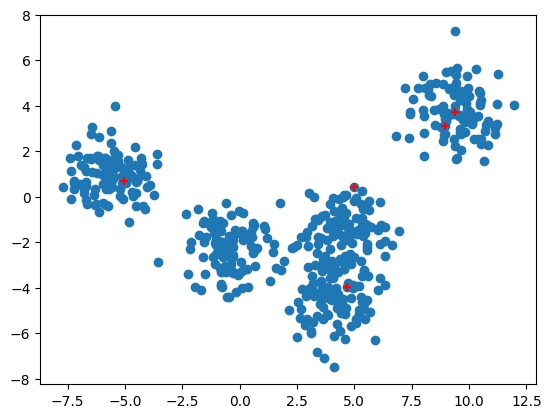

In [172]:
# cluster data and visualize them again

# step 1 & 2: Select K and intialize them randomly
K = num_clusters
centroids = initialize_centriods(X, K)
# visualise data again
print(centroids)
plt.scatter(X[:,0], X[:,1])
plt.scatter(centroids[:,0], centroids[:,1], color="red", marker="+")
plt.show()

In [103]:
# Step 3: Assign all the points to the closest cluster centroid, ie, assign_points_to_clusters
clusters = assign_points_to_clusters(X, centroids)


In [105]:
# Step 4: Recompute the centroids of newly formed clusters
new_centriods= calculate_new_centriods(clusters, X)

In [106]:
# re-predict the label (ie, assigned cluster) of each point
y_pred = predict_cluster(X, clusters)

[4. 0. 4. 3. 4. 3. 0. 4. 1. 1. 0. 4. 4. 2. 4. 3. 4. 2. 3. 4. 3. 4. 0. 4.
 3. 1. 2. 4. 4. 2. 0. 2. 3. 4. 2. 2. 3. 1. 0. 4. 2. 4. 0. 2. 4. 0. 1. 3.
 4. 3. 0. 3. 4. 3. 0. 0. 2. 2. 2. 0. 0. 2. 2. 2. 3. 1. 0. 3. 0. 3. 3. 2.
 2. 4. 3. 2. 3. 2. 0. 3. 3. 3. 4. 3. 2. 3. 3. 2. 1. 3. 2. 0. 0. 0. 0. 3.
 3. 0. 2. 0. 0. 2. 2. 2. 3. 3. 2. 2. 3. 3. 3. 3. 2. 3. 0. 3. 2. 2. 3. 2.
 2. 4. 4. 3. 4. 3. 2. 1. 4. 3. 3. 4. 0. 3. 0. 2. 2. 0. 4. 0. 3. 2. 1. 3.
 0. 2. 2. 4. 3. 0. 0. 4. 0. 4. 4. 2. 0. 3. 0. 4. 3. 3. 1. 4. 2. 0. 3. 0.
 4. 4. 0. 2. 3. 3. 3. 0. 2. 3. 4. 0. 4. 4. 0. 3. 3. 2. 0. 2. 2. 4. 2. 2.
 0. 2. 3. 3. 4. 3. 2. 4. 4. 3. 2. 3. 0. 4. 3. 0. 2. 1. 1. 0. 2. 4. 0. 0.
 0. 0. 3. 4. 2. 4. 0. 0. 3. 2. 4. 2. 4. 2. 4. 4. 1. 2. 3. 3. 2. 1. 0. 3.
 2. 4. 3. 3. 0. 2. 0. 2. 4. 4. 4. 3. 0. 0. 3. 2. 2. 0. 0. 3. 2. 3. 2. 2.
 2. 0. 0. 2. 1. 0. 3. 4. 3. 4. 3. 4. 3. 3. 4. 3. 4. 4. 2. 2. 0. 0. 0. 4.
 0. 0. 0. 2. 3. 3. 2. 0. 4. 0. 0. 3. 0. 2. 4. 4. 2. 4. 0. 0. 2. 3. 3. 3.
 0. 2. 0. 0. 2. 0. 1. 2. 3. 3. 3. 4. 3. 2. 4. 0. 1.

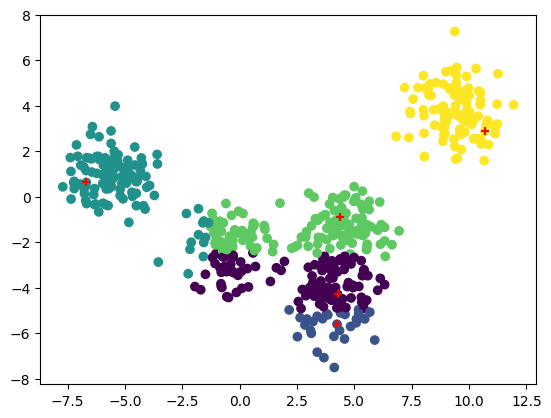

In [107]:
# visulize again
plt.scatter(X[:,0], X[:,1], c= y_pred)
plt.scatter(centroids[:,0], centroids[:,1], color="red", marker="+")
plt.show()

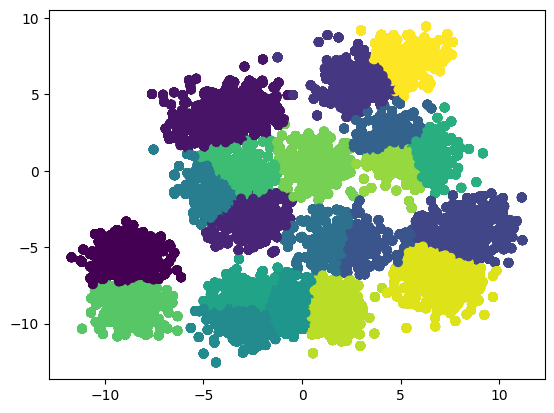

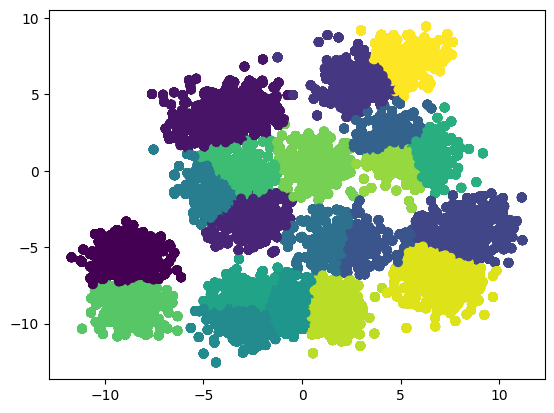

In [183]:
# repeating the above many times (last step)

# all code here
#np.random.seed(654)

# create dummy dataset
num_clusters = 20
X, _ = make_blobs(n_samples= 5000, n_features= 2, centers= num_clusters)
# visualise data
# plt.scatter(X[:,0], X[:,1])
# time.sleep(0.01)

# cluster data and visualize them again

# step 1 & 2: Select K and intialize them randomly
K = num_clusters
centroids = initialize_centriods(X, K)
# visualise data again
# plt.scatter(X[:,0], X[:,1])
# plt.scatter(centroids[:,0], centroids[:,1], color="red", marker="+")
# plt.show()

# Steps 2 - 5
max_iterations = 1000
for _ in range(max_iterations):
    clusters = assign_points_to_clusters(X, centroids) # create cluster
    previous_centroids = centroids
    centroids = calculate_new_centriods(clusters, X) # calculate new centroids
    diff = centroids - previous_centroids # calculate difference
    if not diff.any():
        break
    y_pred = predict_cluster(X, clusters) # predict function

    # Visualize every time
    plt.scatter(X[:,0], X[:,1], c= y_pred)
    #plt.scatter(centroids[:,0], centroids[:,1], color="red", marker="+")
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(0.1)
